<a href="https://colab.research.google.com/github/t-regbs/CxrCovidClassify/blob/master/MobileNetV2_Covid_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/csc532.zip

Archive:  /content/csc532.zip
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (1).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (10).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (100).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (101).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (102).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (103).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (104).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (105).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (106).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (107).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (108).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (109).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (11).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (110).jpg  
  inflating: DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (111).jpg  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/covid_cxr/csc532.zip /content

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pyplot
import pandas as pd
from tensorflow import keras
import os
import shutil
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.models import Model
from keras import models
from keras import layers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import math
from sklearn.utils import class_weight
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
original_dataset_dir_negative = '/content/datasets/datasets/train/negative'
original_dataset_dir_positive = '/content/datasets/datasets/train/positive'
base_dir = '/content/Data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [ ]:
train_negative_dir = os.path.join(train_dir, 'negative')
train_positive_dir = os.path.join(train_dir, 'positive')
#####################################################
validation_negative_dir = os.path.join(validation_dir, 'negative')
validation_positive_dir = os.path.join(validation_dir, 'positive')
######################################################
test_negative_dir = os.path.join(test_dir, 'negative')
test_positive_dir = os.path.join(test_dir, 'positive')

In [ ]:
os.mkdir(train_negative_dir)
os.mkdir(train_positive_dir)
######################################
os.mkdir(validation_negative_dir)
os.mkdir(validation_positive_dir)
########################################
os.mkdir(test_negative_dir)
os.mkdir(test_positive_dir)

In [ ]:
positive_image = os.listdir("/content/datasets/datasets/train/positive")
negative_image = os.listdir("/content/datasets/datasets/train/negative")
print(len(negative_image))
print(len(positive_image))

551
125


In [ ]:
for i in range(501):

  src = os.path.join(original_dataset_dir_negative,negative_image[i] )
  dst = os.path.join(train_negative_dir,negative_image[i])
  shutil.copyfile(src, dst)

for i in range(501,531):

  src = os.path.join(original_dataset_dir_negative,negative_image[i] )
  dst = os.path.join(validation_negative_dir,negative_image[i])
  shutil.copyfile(src, dst)

for i in range(531,551):
  
  src = os.path.join(original_dataset_dir_negative,negative_image[i] )
  dst = os.path.join(test_negative_dir,negative_image[i])
  shutil.copyfile(src, dst)

print(i)

550


In [ ]:
for i in range(100):
  src = os.path.join(original_dataset_dir_positive,positive_image[i] )
  dst = os.path.join(train_positive_dir,positive_image[i])
  shutil.copyfile(src, dst)
print("done with train")

for i in range(100,113):
  src = os.path.join(original_dataset_dir_positive,positive_image[i] )
  dst = os.path.join(validation_positive_dir,positive_image[i])
  shutil.copyfile(src, dst)
print("done with validation")

for i in range(113,125):
  src = os.path.join(original_dataset_dir_positive,positive_image[i] )
  dst = os.path.join(test_positive_dir,positive_image[i])
  shutil.copyfile(src, dst)
print("done with test")

done with train
done with validation
done with test


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(224, 224),
  batch_size=16,
  class_mode='binary')

Found 601 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(224, 224),
  batch_size=16,
  class_mode='binary')

test_generator = test_datagen.flow_from_directory(
  test_dir,
  target_size=(224, 224),
  batch_size=16,
  class_mode='binary',
  shuffle=False)

Found 43 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [ ]:
class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(train_generator.classes), 
                train_generator.classes)
train_class_weights = dict(enumerate(class_weights))

In [ ]:
from tensorflow.keras.applications import MobileNetV2
INPUT_SHAPE = (224, 224, 3)
mob_net=MobileNetV2( include_top=False,weights="imagenet",
    input_shape=INPUT_SHAPE ,
    pooling=max)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in mob_net.layers:
    layer.trainable = False

In [ ]:
mob_net.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
model =  tf.keras.models.Sequential()
model.add(mob_net)
model.add(Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

epochs=20
lr=1e-6

opt = tf.keras.optimizers.Adam(learning_rate = lr)

checkpoint_filepath =  '/content/drive/MyDrive/models/model_mob_1.h5'
model_checkpoint_callback_ = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    save_freq="epoch",
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=False)
model.compile(optimizer= opt, loss = 'binary_crossentropy', metrics=['acc'])

In [ ]:
BATCH_SIZE=16
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))

steps_per_epoch = compute_steps_per_epoch(601)

history =model.fit(train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=epochs,
      validation_data=validation_generator,
      )

Epoch 1/20
38/38 [==============================] - 45s 1s/step - loss: 0.4195 - acc: 0.8253 - val_loss: 0.3888 - val_acc: 0.8140
Epoch 2/20
38/38 [==============================] - 43s 1s/step - loss: 0.3345 - acc: 0.8502 - val_loss: 0.2511 - val_acc: 0.8372
Epoch 3/20
38/38 [==============================] - 43s 1s/step - loss: 0.2280 - acc: 0.9101 - val_loss: 0.1896 - val_acc: 0.9302
Epoch 4/20
38/38 [==============================] - 44s 1s/step - loss: 0.2156 - acc: 0.9052 - val_loss: 0.1547 - val_acc: 0.9535
Epoch 5/20
38/38 [==============================] - 43s 1s/step - loss: 0.1848 - acc: 0.9401 - val_loss: 0.1225 - val_acc: 0.9767
Epoch 6/20
38/38 [==============================] - 44s 1s/step - loss: 0.1610 - acc: 0.9418 - val_loss: 0.1283 - val_acc: 0.9535
Epoch 7/20
38/38 [==============================] - 44s 1s/step - loss: 0.1402 - acc: 0.9534 - val_loss: 0.0963 - val_acc: 0.9767
Epoch 8/20
38/38 [==============================] - 46s 1s/step - loss: 0.1173 - acc: 0.95

In [ ]:
model.save('/content/drive/MyDrive/models/model_mob_frozen_test')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/model_mob_frozen_test/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/model_mob_frozen_test/assets


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/models/model_mob_frozen_test')

In [ ]:
model.evaluate(validation_generator)

3/3 [==============================] - 2s 518ms/step - loss: 0.0482 - acc: 0.9767


[0.04823315516114235, 0.9767441749572754]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
verbose=1)

3/3 [==============================] - 2s 370ms/step


In [ ]:
# Measure accuracy and loss after training

final_loss, final_accuracy = model.evaluate(validation_generator, steps = steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

 3/38 [=>............................] - ETA: 18s - loss: 0.0482 - acc: 0.9767WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 38 batches). You may need to use the repeat() function when building your dataset.


38/38 [==============================] - 2s 32ms/step - loss: 0.0482 - acc: 0.9767
Final loss: 0.05
Final accuracy: 97.67%


In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

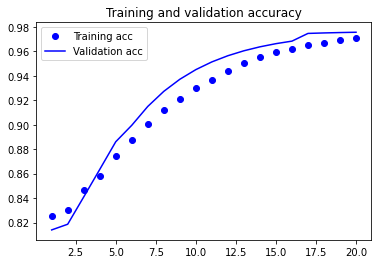

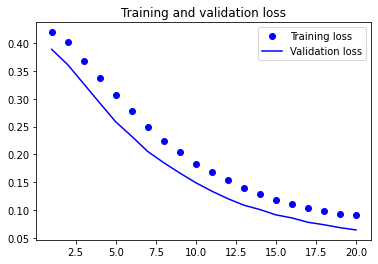

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, smooth_curve(acc), 'bo', label='Training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='Training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)

    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')



##################################################################################################





#Print the Target names



target_names = []

for key in train_generator.class_indices:

    target_names.append(key)



print(target_names)

['negative', 'positive']


In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Confusion Matrix
Normalized confusion matrix


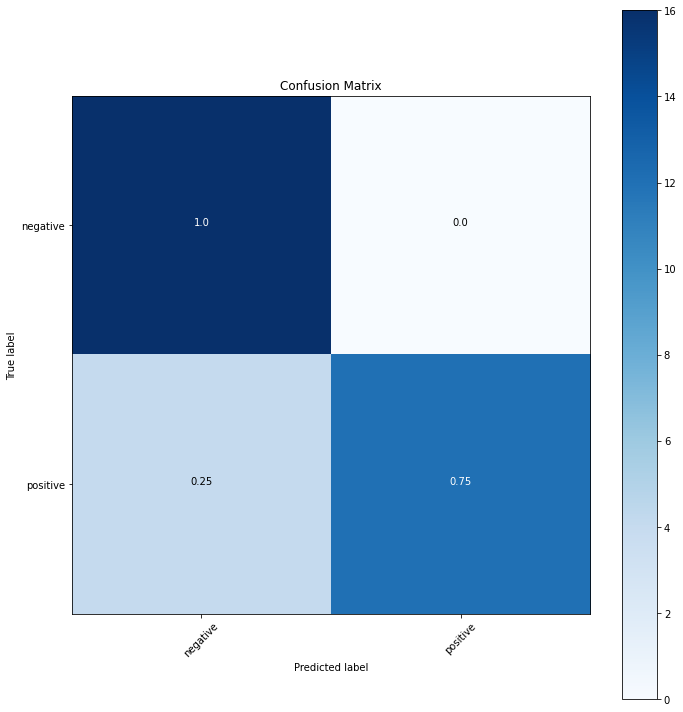

In [ ]:
import itertools  
#Confution Matrix 

cv = []
for i in range(16):
  src = os.path.join(original_dataset_dir_positive,positive_image[i])
  imag = load(src)
  thing = model.predict(imag)
  cv.append(0) if thing < 0.5 else cv.append(1)

for i in range(16):
  src = os.path.join(original_dataset_dir_negative,negative_image[i])
  imag = load(src)
  thing = model.predict(imag)
  cv.append(0) if thing < 0.5 else cv.append(1)

print(cv)
Y_pred = model.predict(validation_generator)

print('Confusion Matrix')
actual = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
cm = confusion_matrix(actual, cv)

plot_confusion_matrix(cm, target_names, normalize=True, title='Confusion Matrix')



Confusion matrix, without normalization


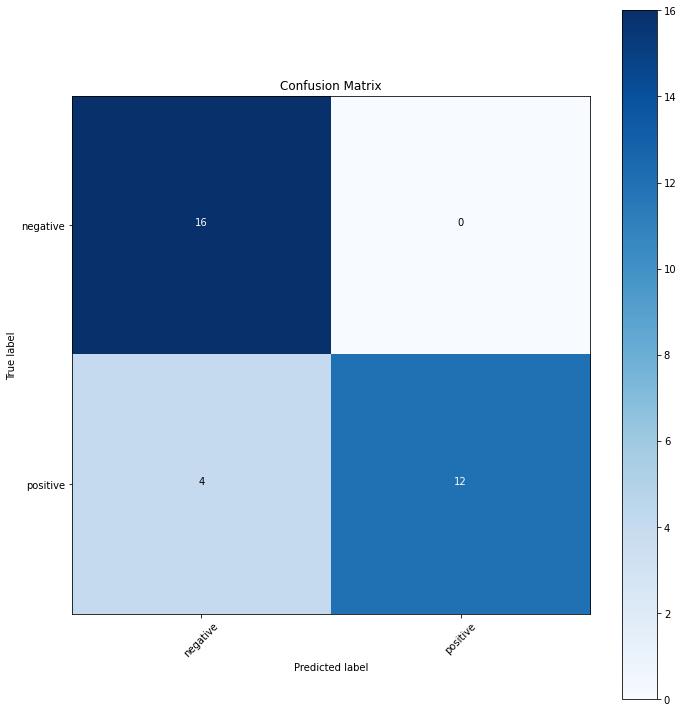

In [ ]:
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

In [ ]:
#Print Classification Report

print('Classification Report')

print(classification_report(actual, cv, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    negative       0.80      1.00      0.89        16
    positive       1.00      0.75      0.86        16

    accuracy                           0.88        32
   macro avg       0.90      0.88      0.87        32
weighted avg       0.90      0.88      0.87        32



Load SavedModel

In [ ]:
mob_net_model = keras.models.load_model('/content/drive/MyDrive/models/model_mob_frozen_test')

In [ ]:
# Get images and labels batch from validation dataset generator

val_image_batch, val_label_batch = next(iter(validation_generator))
true_label_ids = np.argmax(val_label_batch, axis=0)

print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (16, 224, 224, 3)


In [ ]:
tf_model_predictions = mob_net_model(val_image_batch)
print("Prediction results shape:", tf_model_predictions.shape)

Prediction results shape: (16, 1)


In [ ]:
# Convert prediction results to Pandas dataframe, for better visualization
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

tf_pred_dataframe = pd.DataFrame(tf_model_predictions.numpy())
# tf_pred_dataframe.columns = dataset_labels

print("Prediction results for the first elements")
tf_pred_dataframe.head()

['Negative' 'Positive']
Prediction results for the first elements


,0
0,0.034295
1,0.996157
2,0.004752
3,0.061456
4,0.060787


In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]

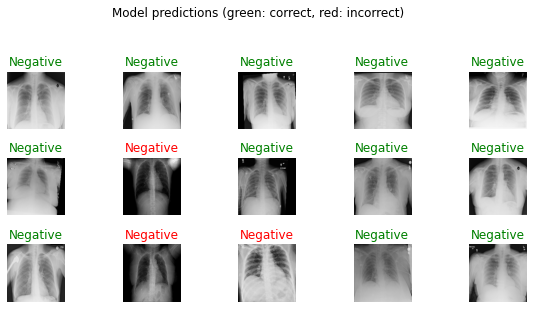

In [ ]:
# Print images batch and labels predictions

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(15):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == val_label_batch[n] else "red"
  plt.title(predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

Convert Model to TFLite

In [ ]:
!mkdir "tflite_models"

In [ ]:
TFLITE_MODEL = "tflite_models/mob_net.tflite"
TFLITE_QUANT_MODEL = "tflite_models/mob_net_quant.tflite"

In [ ]:
# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : mob_net_model(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open(TFLITE_MODEL, "wb").write(converted_tflite_model)

# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open(TFLITE_QUANT_MODEL, "wb").write(tflite_quant_model)

print("TFLite models and their sizes:")
!ls "tflite_models" -lh

TFLite models and their sizes:
total 165M
-rw-r--r-- 1 root root  34M Jul 22 18:18 mob_net_quant.tflite
-rw-r--r-- 1 root root 131M Jul 22 18:18 mob_net.tflite


Load TFlite Model

In [ ]:
# Load TFLite model and see some details about input/output

tflite_interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL)

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: x
shape: [  1 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [1 1]
type: <class 'numpy.float32'>


Resize input and output tensors shapes
Input shape of loaded TFLite model is 1x224x224x3, what means that we can make predictions for single image.

Let's resize input and output tensors, so we can make predictions for batch of 16 images.

In [ ]:
tflite_interpreter.resize_tensor_input(input_details[0]['index'], (16, 224, 224, 3))
tflite_interpreter.resize_tensor_input(output_details[0]['index'], (16, 1))
tflite_interpreter.allocate_tensors()

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: x
shape: [ 16 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [16  1]
type: <class 'numpy.float32'>


In [ ]:
tflite_interpreter.set_tensor(input_details[0]['index'], val_image_batch)

tflite_interpreter.invoke()

tflite_model_predictions = tflite_interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)

Prediction results shape: (16, 1)


In [ ]:
# Convert prediction results to Pandas dataframe, for better visualization

tflite_pred_dataframe = pd.DataFrame(tflite_model_predictions)
# tflite_pred_dataframe.columns = dataset_labels

print("TFLite prediction results for the first elements")
tflite_pred_dataframe.head()

TFLite prediction results for the first elements


,0
0,0.010524
1,0.008200
2,0.000631
3,0.155507
4,0.001156


Now let's do the same for TFLite quantized model:

Load model,
Reshape input to handle batch of images,
Run prediction

In [ ]:
# Load quantized TFLite model
tflite_interpreter_quant = tf.lite.Interpreter(model_path=TFLITE_QUANT_MODEL)

# Learn about its input and output details
input_details = tflite_interpreter_quant.get_input_details()
output_details = tflite_interpreter_quant.get_output_details()

# Resize input and output tensors to handle batch of 32 images
tflite_interpreter_quant.resize_tensor_input(input_details[0]['index'], (16, 224, 224, 3))
tflite_interpreter_quant.resize_tensor_input(output_details[0]['index'], (16, 1))
tflite_interpreter_quant.allocate_tensors()

input_details = tflite_interpreter_quant.get_input_details()
output_details = tflite_interpreter_quant.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

# Run inference
tflite_interpreter_quant.set_tensor(input_details[0]['index'], val_image_batch)

tflite_interpreter_quant.invoke()

tflite_q_model_predictions = tflite_interpreter_quant.get_tensor(output_details[0]['index'])
print("\nPrediction results shape:", tflite_q_model_predictions.shape)

== Input details ==
name: x
shape: [ 16 224 224   3]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [16  1]
type: <class 'numpy.float32'>

Prediction results shape: (16, 1)


In [ ]:
# Convert prediction results to Pandas dataframe, for better visualization

tflite_q_pred_dataframe = pd.DataFrame(tflite_q_model_predictions)
# tflite_q_pred_dataframe.columns = dataset_labels

print("Quantized TFLite model prediction results for the first elements")
tflite_q_pred_dataframe.head()

Quantized TFLite model prediction results for the first elements


,0
0,0.008889
1,0.010984
2,0.002360
3,0.217827
4,0.002253


Compare prediction results
Now we will use Pandas to visualize results from all 3 models and find differences between them.

In [ ]:
# Concatenate results from all models

all_models_dataframe = pd.concat([tf_pred_dataframe, 
                                  tflite_pred_dataframe, 
                                  tflite_q_pred_dataframe], 
                                 keys=['TF Model', 'TFLite', 'TFLite quantized'],
                                 axis='columns')
all_models_dataframe.head()

,TF Model,TFLite,TFLite quantized
,0,0,0
0,0.034295,0.010524,0.008889
1,0.996157,0.008200,0.010984
2,0.004752,0.000631,0.002360
3,0.061456,0.155507,0.217827
4,0.060787,0.001156,0.002253


In [ ]:
# Highlight TFLite models predictions that are different from original model

def highlight_diff(data, color='green'):
    attr = 'background-color: {}'.format(color)
    other = data.xs('TF Model', axis='columns', level=-2)
    return pd.DataFrame(np.where(data.ne(other, level=1), attr, ''),
                        index=data.index, columns=data.columns)

all_models_dataframe.style.apply(highlight_diff, axis=None)

,TF Model,TFLite,TFLite quantized
,0,0,0
0,0.034295,0.010524,0.008889
1,0.996157,0.008200,0.010984
2,0.004752,0.000631,0.002360
3,0.061456,0.155507,0.217827
4,0.060787,0.001156,0.002253
5,0.000139,0.001104,0.001829
6,0.034158,0.788767,0.746771
7,0.070527,0.000202,0.000256
8,0.015236,0.002561,0.002717


As we can see, in most cases predictions are different between all models, usually by small factors. High-confidence predictions between TensorFlow and TensorFlow Lite models are very close to each other (in some cases there are even similar).
Quantized model outstands the most, but this is the cost of optimizations (model weights 3-4 times less).

Visualize predictions from TFLite models

Finally, let's visualize predictions from TensorFlow Lite and quantized TensorFlow Lite models.

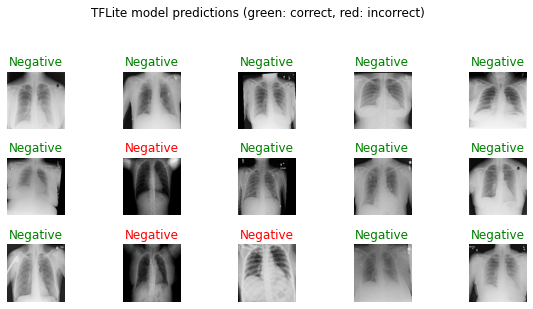

In [ ]:
# Print images batch and labels predictions for TFLite Model

tflite_predicted_ids = np.argmax(tflite_model_predictions, axis=-1)
tflite_predicted_labels = dataset_labels[tflite_predicted_ids]
tflite_label_id = np.argmax(val_label_batch, axis=-1)

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(15):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if tflite_predicted_ids[n] == val_label_batch[n] else "red"
  plt.title(tflite_predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("TFLite model predictions (green: correct, red: incorrect)")

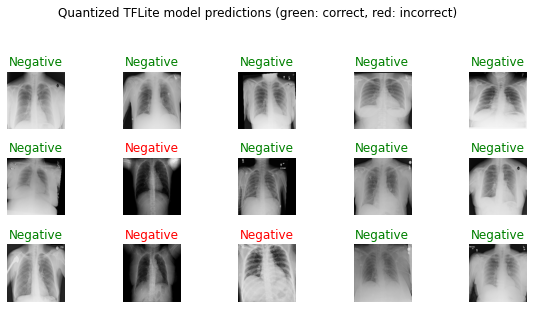

In [ ]:
# Print images batch and labels predictions for TFLite Model

tflite_q_predicted_ids = np.argmax(tflite_q_model_predictions, axis=-1)
tflite_q_predicted_labels = dataset_labels[tflite_q_predicted_ids]
tflite_q_label_id = np.argmax(val_label_batch, axis=-1)

plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(15):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if tflite_q_predicted_ids[n] == val_label_batch[n] else "red"
  plt.title(tflite_q_predicted_labels[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Quantized TFLite model predictions (green: correct, red: incorrect)")